In [1]:
from qiskit_metal import designs, MetalGUI

design = designs.DesignPlanar()
design.overwrite_enabled = True

In [2]:
design.chips.main.size_x = '14mm'
design.chips.main.size_y = '10mm'

In [3]:
gui = MetalGUI(design)

In [5]:
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket
TransmonPocket.default_options

{'chip': 'main',
 'pos_x': '0um',
 'pos_y': '0um',
 'pad_gap': '30um',
 'inductor_width': '20um',
 'pad_width': '455um',
 'pad_height': '90um',
 'pocket_width': '650um',
 'pocket_height': '650um',
 'orientation': '0',
 '_default_connection_pads': {'pad_gap': '15um',
  'pad_width': '125um',
  'pad_height': '30um',
  'pad_cpw_shift': '5um',
  'pad_cpw_extent': '25um',
  'cpw_width': 'cpw_width',
  'cpw_gap': 'cpw_gap',
  'cpw_extend': '100um',
  'pocket_extent': '5um',
  'pocket_rise': '65um',
  'loc_W': '+1',
  'loc_H': '+1'}}

In [6]:
from qiskit_metal.qlibrary.qubits.transmon_pocket_cl import TransmonPocketCL

design.delete_all_components()

design_span_x = 8
design_span_y = 4

half_chip_width = design_span_x // 2
half_chip_height = design_span_y // 2

connection_pads_options = dict(
    a = dict(loc_W=1, loc_H=-1),
    b = dict(loc_W=1, loc_H=1),
    c = dict(loc_W=-1, loc_H=-1)
)

transmons = []

transmons.append(TransmonPocketCL(design, 'Q1',
                      options=dict(pos_x=f'-{half_chip_width}mm',
                                   pos_y=f'{-half_chip_height}mm',
                                   connection_pads=dict(**connection_pads_options))))

transmons.append(TransmonPocketCL(design, 'Q2',
                      options=dict(pos_x=f'0mm',
                                   pos_y=f'{half_chip_height}mm',
                                   orientation=-90,
                                   connection_pads=dict(d=dict(loc_W=-1, loc_H=1), **connection_pads_options))))

transmons.append(TransmonPocketCL(design, 'Q3',
                      options=dict(pos_x=f'0mm',
                                   pos_y=f'{-half_chip_height}mm',
                                   orientation=90,
                                   connection_pads=dict(d=dict(loc_W=-1, loc_H=1), **connection_pads_options))))

transmons.append(TransmonPocketCL(design, 'Q4',
                      options=dict(pos_x=f'{half_chip_width}mm',
                                   pos_y=f'{half_chip_height}mm',
                                   orientation=180,
                                   connection_pads=dict(**connection_pads_options))))

gui.rebuild()
gui.autoscale()

In [7]:
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal import Dict

fillet='99.99um'
options = Dict(
    meander=Dict(
        lead_start='0.1mm',
        lead_end='0.1mm',
        asymmetry='0 um')
)

def connect(component_name: str, component1: str, pin1: str, component2: str, pin2: str,
            length: str,
            asymmetry='0 um', start_strght='0 um', end_strght='0 um', flip=False):
    """Connect two pins with a CPW."""
    myoptions = Dict(
        pin_inputs=Dict(
            start_pin=Dict(
                component=component1,
                pin=pin1),
            end_pin=Dict(
                component=component2,
                pin=pin2)),
        lead=Dict(
            start_straight=start_strght,
            end_straight=end_strght
        ),
        total_length=length,
    fillet = '99.9um')
    myoptions.update(options)
    myoptions.meander.asymmetry = asymmetry
    myoptions.meander.lead_direction_inverted = 'true' if flip else 'false'
    return RouteMeander(design, component_name, myoptions)

asym_h = 100
asym_v = 100
cpw = []

cpw.append(connect('cpw1', 'Q2', 'a', 'Q1', 'b', '14851.48 um', f'+{asym_h}um', '0.4mm', '0.2mm'))
cpw.append(connect('cpw2', 'Q3', 'b', 'Q2', 'b', '14705.88 um', f'-{asym_v}um', '1mm', '1mm'))
cpw.append(connect('cpw3', 'Q3', 'a', 'Q4', 'b', '14563.1 um', f'+{asym_h}um', '0.4mm', '0.2mm'))
cpw.append(connect('cpw4', 'Q3', 'd', 'Q1', 'a', '14423.07 um', f'-{asym_h}um', '0.1mm', '0.1mm'))
cpw.append(connect('cpw5', 'Q2', 'd', 'Q4', 'a', '14285.71 um', f'-{asym_h}um', '0.1mm', '0.1mm'))


gui.rebuild()
gui.autoscale()

In [8]:
from qiskit_metal.qlibrary.terminations.launchpad_wb_coupled import LaunchpadWirebondCoupled

readouts_lwc = []
control_lwc = []

offset_x = 0
offset_y = 1


#Readouts
readouts_lwc.append(LaunchpadWirebondCoupled(design, 'R1',
                                         options = dict(
                                         pos_x = '-6mm',
                                         pos_y = f'-{half_chip_height+offset_y}mm',
                                         lead_length = '30um')))

readouts_lwc.append(LaunchpadWirebondCoupled(design, 'R2',
                                         options = dict(
                                         pos_x = '-1mm',
                                         pos_y = '4mm',
                                         orientation = -90,
                                         lead_length = '30um')))

readouts_lwc.append(LaunchpadWirebondCoupled(design, 'R3',
                                         options = dict(
                                         pos_x = '1mm',
                                         pos_y = '-4mm',
                                         orientation = 90,
                                         lead_length = '30um')))

readouts_lwc.append(LaunchpadWirebondCoupled(design, 'R4',
                                         options = dict(
                                         pos_x = '6mm',
                                         pos_y = f'{half_chip_height+offset_y}mm',
                                         orientation = 180,
                                         lead_length = '30um')))

#Controls
control_lwc.append(LaunchpadWirebondCoupled(design, 'CL1',
                                         options = dict(
                                         pos_x = '-6mm',
                                         pos_y = '2mm',
                                         lead_length = '30um')))

control_lwc.append(LaunchpadWirebondCoupled(design, 'CL2',
                                         options = dict(
                                         pos_x = '4mm',
                                         pos_y = '4mm',
                                         orientation = -90,
                                         lead_length = '30um')))

control_lwc.append(LaunchpadWirebondCoupled(design, 'CL3',
                                         options = dict(
                                         pos_x = '-4mm',
                                         pos_y = '-4mm',
                                         orientation = 90,
                                         lead_length = '30um')))

control_lwc.append(LaunchpadWirebondCoupled(design, 'CL4',
                                         options = dict(
                                         pos_x = '6mm',
                                         pos_y = '-2mm',
                                         orientation = 180,
                                         lead_length = '30um')))

gui.rebuild()
gui.autoscale()

In [9]:
readout_lines = []

asym_14 = 1000
asym_23 = 1000
options = Dict(
    lead=Dict(
        start_straight='430um',
        end_straight='0um'),
    fillet='99.99um')

readout_lines.append(connect('ol1', 'Q1', 'c', 'R1', 'tie', '10714.28um', f'{asym_14}um'))
readout_lines.append(connect('ol2', 'Q2', 'c', 'R2', 'tie', '10563.38um', f'{asym_23}um'))
readout_lines.append(connect('ol3', 'Q3', 'c', 'R3', 'tie', '10416.66um', f'{asym_23}um'))
readout_lines.append(connect('ol4', 'Q4', 'c', 'R4', 'tie', '10273.97um', f'{asym_14}um'))

gui.rebuild()
gui.autoscale()

In [10]:
from qiskit_metal.qlibrary.tlines.anchored_path import RouteAnchors
from collections import OrderedDict
import numpy as np

control_lines = []

def connectRouteAnchor(name: str,
                       component1: str, pin1: str, component2: str, pin2: str,
                       anchor_points: OrderedDict) -> RouteAnchors:

    options_line_cl = dict(
        pin_inputs = dict(start_pin = dict(component = component1, pin = pin1),
                          end_pin = dict(component = component2, pin = pin2)),
        anchors = anchor_points,
        lead = dict(start_straight = '200um',
                    end_straight = '225um'),
        fillet = fillet
    )
    
    return RouteAnchors(design, name, options_line_cl)



anchors1c = OrderedDict()
anchors1c[0] = np.array([-5, -1.92])
anchors1c[1] = np.array([-5, 2])

control_lines.append(connectRouteAnchor('line_cl1', 'Q1', 'Charge_Line', 'CL1', 'tie', anchors1c))


anchors2c = OrderedDict()
anchors2c[0] = np.array([0.08, 3.25])
anchors2c[1] = np.array([4, 3.25])

control_lines.append(connectRouteAnchor('line_cl2', 'Q2', 'Charge_Line', 'CL2', 'tie', anchors2c))

anchors3c = OrderedDict()
anchors3c[0] = np.array([-0.08, -3.25])
anchors3c[1] = np.array([-4, -3.25])

control_lines.append(connectRouteAnchor('line_cl3', 'Q3', 'Charge_Line', 'CL3', 'tie', anchors3c))

anchors4c = OrderedDict()
anchors4c[0] = np.array([5, 1.92])
anchors4c[1] = np.array([5, -2])

control_lines.append(connectRouteAnchor('line_cl4', 'Q4', 'Charge_Line', 'CL4', 'tie', anchors4c))

gui.rebuild()
gui.autoscale()

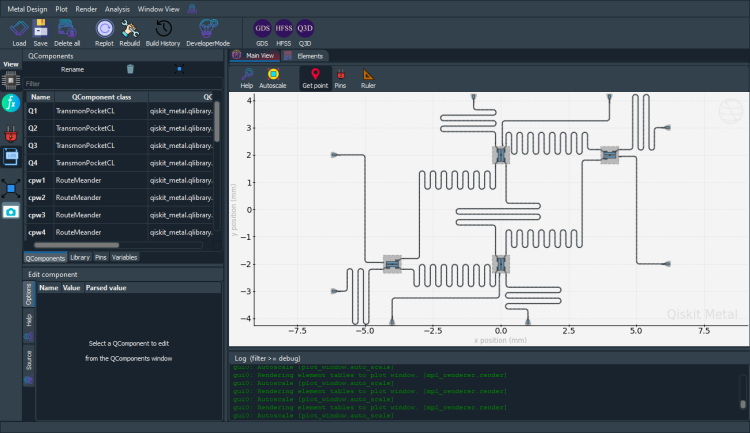

In [11]:
gui.screenshot()

In [12]:
# Qubit Frequencies
# Q1 : 5
# Q2 : 5.1
# Q3 : 5.2
# Q4 : 5.3

# CPW Frequencies
# cpw1 : 5.05
# cpw2 : 5.1
# cpw3 : 5.15
# cpw4 : 5.2
# cpw5 : 5.25

# Readout Frequencies
# R1 : 7
# R2 : 7.1
# R3 : 7.2
# R4 : 7.3

In [13]:
# CPW length calculator
freq = 5.25 * (10**9)
c = 3 * (10**8)
lamb = c / freq * (10**6)
lamb/4

14285.714285714284

In [14]:
q3d = design.renderers.q3d

In [15]:
q3d.options

{'Lj': '10nH',
 'Cj': 0,
 '_Rj': 0,
 'max_mesh_length_jj': '7um',
 'project_path': None,
 'project_name': None,
 'design_name': None,
 'ansys_file_extension': '.aedt',
 'x_buffer_width_mm': 0.2,
 'y_buffer_width_mm': 0.2,
 'wb_threshold': '400um',
 'wb_offset': '0um',
 'wb_size': 5,
 'plot_ansys_fields_options': {'name': 'NAME:Mag_E1',
  'UserSpecifyName': '0',
  'UserSpecifyFolder': '0',
  'QuantityName': 'Mag_E',
  'PlotFolder': 'E Field',
  'StreamlinePlot': 'False',
  'AdjacentSidePlot': 'False',
  'FullModelPlot': 'False',
  'IntrinsicVar': "Phase='0deg'",
  'PlotGeomInfo_0': '1',
  'PlotGeomInfo_1': 'Surface',
  'PlotGeomInfo_2': 'FacesList',
  'PlotGeomInfo_3': '1'}}

In [96]:
q3d.new_ansys_project()

In [97]:
q3d.connect_ansys()

INFO 10:07PM [connect_project]: Connecting to Ansys Desktop API...
INFO 10:07PM [load_ansys_project]: 	Opened Ansys App
INFO 10:07PM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 10:07PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/Nilay/Documents/Ansoft/
	Project:   Project35
INFO 10:07PM [connect_design]: No active design found (or error getting active design).
INFO 10:07PM [connect]: 	 Connected to project "Project35". No design detected


### LOM Analyses

#### Qubit (Q1)

In [42]:
transmons[0].options.pad_gap    = '40um'
transmons[0].options.pad_width  = '400um'
transmons[0].options.pad_height = '90um'
gui.rebuild()
gui.autoscale()

q3d.activate_q3d_design("Q1")
q3d.add_q3d_setup(name = 'Tune_Q1', max_passes = 15, min_converged_passes = 5, percent_error = 0.05)
q3d.activate_q3d_setup('Tune_Q1')
q3d.render_design(['Q1'], [('Q1', 'c'), ('Q1', 'a'),('Q1', 'b'),('Q1', 'Charge_Line')])
q3d.analyze_setup('Tune_Q1')
q3d.get_capacitance_matrix()

In [ ]:
Q1_lom = q3d.lumped_oscillator_vs_passes(12, 1, 4, 7, [5.2, 5.05, 5], 15)
q3d.plot_convergence_main(Q1_lom)
q3d.plot_convergence_chi(Q1_lom)

#### Qubit (Q2)

In [32]:
transmons[1].options.pad_gap    = '40um'
transmons[1].options.pad_width  = '375um'
transmons[1].options.pad_height = '90um'
gui.rebuild()
gui.autoscale()

q3d.activate_q3d_design("Q2")
q3d.add_q3d_setup(name = 'Tune_Q2', max_passes = 15, min_converged_passes = 5, percent_error = 0.05)
q3d.activate_q3d_setup('Tune_Q2')
q3d.render_design(['Q2'], [('Q2', 'c'), ('Q2', 'a'),('Q2', 'b'),('Q2', 'd'),('Q2', 'Charge_Line')])
q3d.analyze_setup('Tune_Q2')
q3d.get_capacitance_matrix()

06:50PM 47s WARNING [activate_q3d_design]: The name=Q2 was not in active project.  A new design will be inserted to the project.  Names in active project are: 
[].  
INFO 06:50PM [connect_design]: 	Opened active design
	Design:    Q2 [Solution type: Q3D]
WARNING 06:50PM [connect_setup]: 	No design setup detected.
WARNING 06:50PM [connect_setup]: 	Creating Q3D default setup.
INFO 06:50PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 06:50PM [get_setup]: 	Opened setup `Tune_Q2`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 06:50PM [get_setup]: 	Opened setup `Tune_Q2`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 06:50PM [analyze]: Analyzing setup Tune_Q2
INFO 07:01PM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmp6xkrgwt9.txt, C, , Tune_Q2:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 3, False


,a_connector_pad_Q2,b_connector_pad_Q2,c_connector_pad_Q2,cl_metal_Q2,d_connector_pad_Q2,ground_main_plane,pad_bot_Q2,pad_top_Q2
a_connector_pad_Q2,52.50985,-0.38268,-0.60935,-0.00982,-0.16565,-35.19688,-13.72733,-1.50801
b_connector_pad_Q2,-0.38268,52.51435,-0.16560,-0.01135,-0.60659,-35.19283,-1.51421,-13.72601
c_connector_pad_Q2,-0.60935,-0.16560,52.52167,-0.05395,-0.38287,-35.16350,-13.72832,-1.50807
cl_metal_Q2,-0.00982,-0.01135,-0.05395,16.48118,-0.15460,-15.91792,-0.10707,-0.14896
d_connector_pad_Q2,-0.16565,-0.60659,-0.38287,-0.15460,52.53966,-35.07720,-1.51456,-13.72434
ground_main_plane,-35.19688,-35.19283,-35.16350,-15.91792,-35.07720,274.30364,-29.86662,-29.81329
pad_bot_Q2,-13.72733,-1.51421,-13.72832,-0.10707,-1.51456,-29.86662,86.50443,-23.79104
pad_top_Q2,-1.50801,-13.72601,-1.50807,-0.14896,-13.72434,-29.81329,-23.79104,86.51578


In [33]:
Q2_lom = q3d.lumped_oscillator_vs_passes(12, 1, 5, 7.1, [5.05, 5.1, 5.25, 5.1], 15)
q3d.plot_convergence_main(Q2_lom)
q3d.plot_convergence_chi(Q2_lom)

INFO 07:18PM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmpq4wnczdl.txt, C, , Tune_Q2:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 07:18PM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmpu9yq73d1.txt, C, , Tune_Q2:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 07:18PM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmp2k6fblwu.txt, C, , Tune_Q2:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 3, False
INFO 07:18PM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmp2bxr_eu8.txt, C, , Tune_Q2:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 4, False
INFO 07:18PM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmplpykltb7.txt, C, , Tune_Q2:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 5, False


[5, 6] [7 0 1 2 3]
Predicted Values

Transmon Properties
f_Q 5.100349 [GHz]
EC 265.735808 [MHz]
EJ 13.616300 [GHz]
alpha -304.560659 [MHz]
dispersion 8.442803 [KHz]
Lq 11.995161 [nH]
Cq 72.892804 [fF]
T1 0.000068 [us]

**Coupling Properties**

tCqbus1 -11.654404 [fF]
gbus1_in_MHz -158.021560 [MHz]
χ_bus1 -3.405910 [MHz]
1/T1bus1 3099.543109 [Hz]
T1bus1 51.347872 [us]

tCqbus2 -2.667487 [fF]
gbus2_in_MHz -25.976097 [MHz]
χ_bus2 32.107944 [MHz]
1/T1bus2 13575.703525 [Hz]
T1bus2 11.723513 [us]

tCqbus3 6.766019 [fF]
gbus3_in_MHz 66.470259 [MHz]
χ_bus3 25378.519954 [MHz]
1/T1bus3 1854487410.174972 [Hz]
T1bus3 0.000086 [us]

tCqbus4 -2.677384 [fF]
gbus4_in_MHz -27.095614 [MHz]
χ_bus4 -6.583338 [MHz]
1/T1bus4 1671.650325 [Hz]
T1bus4 95.208275 [us]

tCqbus5 3.498137 [fF]
gbus5_in_MHz 34.623790 [MHz]
χ_bus5 6885.900725 [MHz]
1/T1bus5 503174189.261712 [Hz]
T1bus5 0.000316 [us]
Bus-Bus Couplings
gbus1_2 25.066816 [MHz]
gbus1_3 44.481870 [MHz]
gbus1_4 26.005680 [MHz]
gbus1_5 7.767015 [MHz]
gbus2_

INFO 07:18PM [hfss_report_full_convergence]: Creating report for variation 0
INFO 07:18PM [__del__]: Disconnected from Ansys HFSS
INFO 07:18PM [__del__]: Disconnected from Ansys HFSS
INFO 07:18PM [__del__]: Disconnected from Ansys HFSS


<Figure size 990x385 with 2 Axes>

#### Qubit (Q3)

In [80]:
transmons[2].options.pad_gap    = '40um'
transmons[2].options.pad_width  = '351um'
transmons[2].options.pad_height = '90um'
gui.rebuild()
gui.autoscale()

q3d.activate_q3d_design("Q3")
q3d.add_q3d_setup(name = 'Tune_Q3', max_passes = 15, min_converged_passes = 5, percent_error = 0.05)
q3d.activate_q3d_setup('Tune_Q3')
q3d.render_design(['Q3'], [('Q3', 'c'), ('Q3', 'a'),('Q3', 'b'),('Q3', 'd'),('Q3', 'Charge_Line')])
q3d.analyze_setup('Tune_Q3')
q3d.get_capacitance_matrix()

INFO 08:48PM [__del__]: Disconnected from Ansys HFSS
08:48PM 21s WARNING [activate_q3d_design]: The name=Q3 was not in active project.  A new design will be inserted to the project.  Names in active project are: 
[].  
INFO 08:48PM [connect_design]: 	Opened active design
	Design:    Q3 [Solution type: Q3D]
WARNING 08:48PM [connect_setup]: 	No design setup detected.
WARNING 08:48PM [connect_setup]: 	Creating Q3D default setup.
INFO 08:48PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 08:48PM [get_setup]: 	Opened setup `Tune_Q3`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 08:48PM [get_setup]: 	Opened setup `Tune_Q3`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 08:48PM [analyze]: Analyzing setup Tune_Q3
INFO 08:58PM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmpv3ssi840.txt, C, , Tune_Q3:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 3, False


,a_connector_pad_Q3,b_connector_pad_Q3,c_connector_pad_Q3,cl_metal_Q3,d_connector_pad_Q3,ground_main_plane,pad_bot_Q3,pad_top_Q3
a_connector_pad_Q3,53.32708,-0.42264,-0.78566,-0.01054,-0.18782,-35.72792,-13.70586,-1.53347
b_connector_pad_Q3,-0.42264,53.32247,-0.18777,-0.01259,-0.78842,-35.72817,-1.52476,-13.71105
c_connector_pad_Q3,-0.78566,-0.18777,53.33965,-0.05625,-0.42288,-35.69385,-13.70492,-1.53360
cl_metal_Q3,-0.01054,-0.01259,-0.05625,16.47233,-0.15621,-15.92888,-0.09841,-0.13396
d_connector_pad_Q3,-0.18782,-0.78842,-0.42288,-0.15621,53.35536,-35.61611,-1.52550,-13.71131
ground_main_plane,-35.72792,-35.72817,-35.69385,-15.92888,-35.61611,272.42963,-27.79565,-27.79115
pad_bot_Q3,-13.70586,-1.52476,-13.70492,-0.09841,-1.52550,-27.79565,82.62291,-22.10457
pad_top_Q3,-1.53347,-13.71105,-1.53360,-0.13396,-13.71131,-27.79115,-22.10457,82.64373


In [81]:
Q3_lom = q3d.lumped_oscillator_vs_passes(12, 1, 5, 7.3, [5.15, 5.1, 5.2, 5.2], 15)
q3d.plot_convergence_main(Q3_lom)
q3d.plot_convergence_chi(Q3_lom)

INFO 09:12PM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmpozzt3qht.txt, C, , Tune_Q3:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 09:12PM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmpp3n00flg.txt, C, , Tune_Q3:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 09:12PM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmp_w406rn3.txt, C, , Tune_Q3:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 3, False
INFO 09:12PM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmp2iqxtejf.txt, C, , Tune_Q3:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 4, False
INFO 09:12PM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmpc_am6_sh.txt, C, , Tune_Q3:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 5, False


[5, 6] [7 0 1 2 3]
Predicted Values

Transmon Properties
f_Q 5.205958 [GHz]
EC 277.571514 [MHz]
EJ 13.616300 [GHz]
alpha -319.341354 [MHz]
dispersion 12.867605 [KHz]
Lq 11.995161 [nH]
Cq 69.784640 [fF]
T1 0.050405 [us]

**Coupling Properties**

tCqbus1 -11.091703 [fF]
gbus1_in_MHz -159.894709 [MHz]
χ_bus1 -3.338175 [MHz]
1/T1bus1 2950.173729 [Hz]
T1bus1 53.947651 [us]

tCqbus2 -2.810817 [fF]
gbus2_in_MHz -28.850004 [MHz]
χ_bus2 36.063303 [MHz]
1/T1bus2 13837.482381 [Hz]
T1bus2 11.501727 [us]

tCqbus3 6.665210 [fF]
gbus3_in_MHz 67.690870 [MHz]
χ_bus3 129.406437 [MHz]
1/T1bus3 21244.589318 [Hz]
T1bus3 7.491552 [us]

tCqbus4 -2.817970 [fF]
gbus4_in_MHz -29.202831 [MHz]
χ_bus4 291.715031 [MHz]
1/T1bus4 1250735.598968 [Hz]
T1bus4 0.127249 [us]

tCqbus5 3.421538 [fF]
gbus5_in_MHz 35.696201 [MHz]
χ_bus5 435.865918 [MHz]
1/T1bus5 1868786.182202 [Hz]
T1bus5 0.085165 [us]
Bus-Bus Couplings
gbus1_2 25.091091 [MHz]
gbus1_3 44.876345 [MHz]
gbus1_4 25.312563 [MHz]
gbus1_5 7.633102 [MHz]
gbus2_3 12.4

  fig = plt.figure(figsize=(11, 3.))

INFO 09:12PM [hfss_report_full_convergence]: Creating report for variation 0


<Figure size 990x385 with 2 Axes>

#### Qubit (Q4)

In [98]:
transmons[3].options.pad_gap    = '40um'
transmons[3].options.pad_width  = '340um'
transmons[3].options.pad_height = '90um'
gui.rebuild()
gui.autoscale()

q3d.activate_q3d_design("Q4")
q3d.add_q3d_setup(name = 'Tune_Q4', max_passes = 15, min_converged_passes = 5, percent_error = 0.05)
q3d.activate_q3d_setup('Tune_Q4')
q3d.render_design(['Q4'], [('Q4', 'c'), ('Q4', 'a'),('Q4', 'b'),('Q4', 'Charge_Line')])
q3d.analyze_setup('Tune_Q4')
q3d.get_capacitance_matrix()

INFO 10:07PM [__del__]: Disconnected from Ansys HFSS
10:07PM 43s WARNING [activate_q3d_design]: The name=Q4 was not in active project.  A new design will be inserted to the project.  Names in active project are: 
[].  
INFO 10:07PM [connect_design]: 	Opened active design
	Design:    Q4 [Solution type: Q3D]
WARNING 10:07PM [connect_setup]: 	No design setup detected.
WARNING 10:07PM [connect_setup]: 	Creating Q3D default setup.
INFO 10:07PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 10:07PM [get_setup]: 	Opened setup `Tune_Q4`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 10:07PM [get_setup]: 	Opened setup `Tune_Q4`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 10:07PM [analyze]: Analyzing setup Tune_Q4
INFO 10:16PM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmpie9aw62v.txt, C, , Tune_Q4:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 3, False


,a_connector_pad_Q4,b_connector_pad_Q4,c_connector_pad_Q4,cl_metal_Q4,ground_main_plane,pad_bot_Q4,pad_top_Q4
a_connector_pad_Q4,53.72717,-0.44669,-0.89387,-0.01163,-36.10018,-13.68432,-1.61235
b_connector_pad_Q4,-0.44669,53.65865,-0.20799,-0.01532,-36.35640,-1.56825,-14.07576
c_connector_pad_Q4,-0.89387,-0.20799,53.70002,-0.05911,-36.17608,-13.69373,-1.68393
cl_metal_Q4,-0.01163,-0.01532,-0.05911,16.49327,-16.06446,-0.10061,-0.16269
ground_main_plane,-36.10018,-36.35640,-36.17608,-16.06446,243.37722,-27.65722,-32.27583
pad_bot_Q4,-13.68432,-1.56825,-13.69373,-0.10061,-27.65722,80.75694,-21.91042
pad_top_Q4,-1.61235,-14.07576,-1.68393,-0.16269,-32.27583,-21.91042,74.09822


In [99]:
Q4_lom = q3d.lumped_oscillator_vs_passes(12, 1, 4, 7.4, [5.25, 5.15, 5.3], 15)
q3d.plot_convergence_main(Q4_lom)
q3d.plot_convergence_chi(Q4_lom)

INFO 10:16PM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmp982ywemp.txt, C, , Tune_Q4:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 10:16PM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmpgxlrxzh0.txt, C, , Tune_Q4:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 10:16PM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmpz7f6a_ya.txt, C, , Tune_Q4:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 3, False
INFO 10:16PM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmpgq5th5_f.txt, C, , Tune_Q4:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 4, False
INFO 10:16PM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmp2jl404vx.txt, C, , Tune_Q4:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 5, False


[4, 5] [6 0 1 2]
Predicted Values

Transmon Properties
f_Q 5.304236 [GHz]
EC 288.849741 [MHz]
EJ 13.616300 [GHz]
alpha -333.517788 [MHz]
dispersion 18.756384 [KHz]
Lq 11.995161 [nH]
Cq 67.059877 [fF]
T1 0.205132 [us]

**Coupling Properties**

tCqbus1 -8.606317 [fF]
gbus1_in_MHz -129.576140 [MHz]
χ_bus1 -2.271039 [MHz]
1/T1bus1 1972.447575 [Hz]
T1bus1 80.689061 [us]

tCqbus2 -1.484765 [fF]
gbus2_in_MHz -16.017394 [MHz]
χ_bus2 11.296481 [MHz]
1/T1bus2 4626.196394 [Hz]
T1bus2 34.402980 [us]

tCqbus3 7.713346 [fF]
gbus3_in_MHz 81.542086 [MHz]
χ_bus3 160.353074 [MHz]
1/T1bus3 14822.515634 [Hz]
T1bus3 10.737377 [us]

tCqbus4 -1.466932 [fF]
gbus4_in_MHz -15.974611 [MHz]
χ_bus4 122.041517 [MHz]
1/T1bus4 754443.321645 [Hz]
T1bus4 0.210957 [us]
Bus-Bus Couplings
gbus1_2 31.840938 [MHz]
gbus1_3 51.102166 [MHz]
gbus1_4 32.356323 [MHz]
gbus2_3 14.989151 [MHz]
gbus2_4 20.854970 [MHz]
gbus3_4 14.780413 [MHz]
Design "Q4" info:
	# eigenmodes    0
	# variations    1


INFO 10:16PM [hfss_report_full_convergence]: Creating report for variation 0


<Figure size 990x385 with 2 Axes>